In [1]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext watermark

# Linear $\alpha \nRightarrow $ linear $p$

The following example highlights how a linear change in individual shape parameters, $\alpha$, does not lead to a linear change in the resulting proportions. The left-hand side graph shows that the **only** way to have that equivalence is when the sum of the shape parameters is constant.

(10000, 2)
(10000, 2)


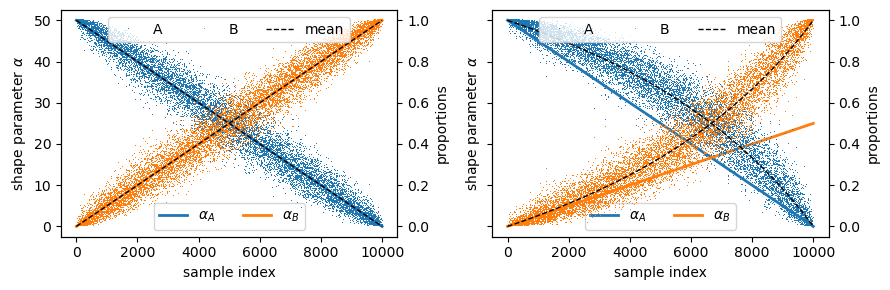

In [2]:
# 2d illustrative case to show difference between alphas and resulting proportions
rng = np.random.default_rng(1234)
N_OBS = 10_000

fig, ax = plt.subplots(1,2,figsize=(9,3), sharex=True, sharey=True)
alpha_sets = [
    np.stack([np.linspace(50,0,N_OBS),np.linspace(0,50,N_OBS)]).T,
    np.stack([np.linspace(50,0,N_OBS),np.linspace(0,25,N_OBS)]).T,
    # 50*np.stack([np.sin(np.linspace(0,2*np.pi,N_OBS))**2,np.cos(np.linspace(0,2*np.pi,N_OBS))**2]).T,
]

for i,alpha in enumerate(alpha_sets):
    # alpha =  np.stack([np.linspace(50,0,N_OBS),np.linspace(0,X,N_OBS)]).T
    # alpha =  np.stack([np.linspace(10,X,N_OBS),np.linspace(0,X*2,N_OBS)]).T
    print(alpha.shape)
    A, B = np.array([rng.dirichlet(alpha=alpha[i,:]) for i in range(N_OBS)]).T # this is our observed Y.

    alpha_mean = alpha/alpha.sum(axis=1)[:,None]

    ax[i].plot(alpha[:,0],'-',lw=2,label=r"$\alpha_A$")
    ax[i].plot(alpha[:,1],'-',lw=2,label=r"$\alpha_B$")
    # ax[i].plot(alpha[:,2],'-',lw=2,label=r"$\alpha_C$")
    ax[i].legend(loc=8,ncol=2)
    ax[i].set_ylabel(r"shape parameter $\alpha$")
    ax[i].set_xlabel("sample index")
    ax2 = ax[i].twinx()
    ax2.plot(A,',',label="A")
    ax2.plot(B,',',label="B")
    # ax2.plot(C,'.',ms=2,mew=0,label="C")
    
    ax2.set_ylabel("proportions")

    ax2.plot(alpha_mean[:,0],'k--',lw=1,label="mean")
    ax2.plot(alpha_mean[:,1],'k--',lw=1)
    ax2.legend(loc=9,ncol=3)

fig.tight_layout()

In [3]:
%watermark
%watermark -iv

Last updated: 2025-03-25T11:09:49.954834+13:00

Python implementation: CPython
Python version       : 3.12.8
IPython version      : 9.0.2

Compiler    : Clang 18.1.8 
OS          : Darwin
Release     : 24.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

numpy     : 2.2.4
matplotlib: 3.10.1

